Team members: Maya Wheeler, Mikayla Comptom, Ashley Pritchard <br>
Project Name: Squirrels In My Park (SIMP) <br>
Repository Link: https://github.com/pritchardashley/Data-Science-SIMP 

### Group Information
    
Mikayla Compton, mikayla.compton@utah.edu, u1538218  <br> 
Ashley Pritchard u1256025@utah.edu, U1256025 <br>
Maya Wheeler, maya.wheeler@hsc.utah.edu, u0999875

Topic: Understanding the correlation between physical squirrel attributes and location on behavior

### Background and Motivation


Almost everywhere we go, campus, a park, or even a big city, there will be squirrels. There are over 280 species of squirrels around the world (1) and come in a variety of colors: Black, brown, grey, red, and even containing purple, orange, and maroon (2) Research has found that squirrels have personalities and similar behaviors to humans (3). There has also been some research into the patterns of dominance in squirrels with older squirrels being more aggressive than younger squirrels and similar patterns for larger and smaller squirrels (4). There is a lot more to learn about squirrels and how and why they behave the ways that they do.


A lot of our interest on this topic stems from our personal observations, specifically with the squirrels on the University of Utah campus. We as a group concluded that the level of human interactions, and food availability may have impacted their behaviors in certain situations. The squirrels on the University of Utah campus even have their own portion of the University of Utah website dedicated to them (University of Utah Website) as well as an annual “Squirrel Fest” held by the Natural History Museum (Squirrel Fest). Although the data set of squirrels that we will be using is not based in Utah, we feel as though we can learn a lot of information, through the application of skills learned in class, to gain a better understanding of the squirrels in Utah and around the world. 


### Project Objectives


The primary question that we want to try to answer within our project is if there is a strong correlation between the physical characteristics and location of the squirrels in central park and their observed behaviors. The specific characteristics that we are focusing on are fur color, highlighted fur color, age, and location of the squirrels. In a part of this we want to see if the squirrels that show fear towards interactions with humans have different characteristics than those squirrels that do not. Our null hypothesis is that the physical characteristics have no effect on behavioral observations and our alternative hypothesis is that the physical characteristics have an effect on the observed behaviors. 	

    
Our learning objective is to utilize what we have learned in class to perform an accurate analysis of our data. Potential skills we hope to apply and understand more deeply include but are not limited to: R-squared, P-value, OLS Regression, descriptive statistics, categorical data, dummy values, data clean, and data visualization. Another thing we want to look into is creating a map of the squirrels in Central Park that shows our results for better visualization.


### Data Description and Acquisition


Our data comes from the 2018 NYC Squirrel Census. This was a citizen science project that had volunteers observing squirrels in Central Park in New York City. The data is in two CSV files, as well as a word document with data definitions. The first file has our primary data, which includes 3022 observations. Each observation has 7 columns identifying the location, time, date, etc for the observation. There are 23 different columns with boolean or nominal values for different attributes of the observed squirrel, such as color (grey, cinnamon or black), what the squirrel was doing(eating, foraging, etc.), and behaviors it displayed, including vocalizations or interactions with humans. The second file is a CSV containing the latitude and longitude of the hectares that the park was broken into for the observations. 


Squirrel census data:
https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/about_data


Hectare data:
https://data.cityofnewyork.us/dataset/2018-Central-Park-Squirrel-Census-Hectare-Grid/qad5-y26n/about_data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import folium
import re
from shapely.geometry import Point, Polygon

ModuleNotFoundError: No module named 'shapely'

In [3]:
nyc_squirrels=pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250304.csv')
hectare = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Hectare_Grid_20250304.csv')
hectare_data = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Hectare_Data_20250325.csv')

### Ethical Considerations


The group that would be the most affected by our analysis would be the squirrel community within central park. Depending on what we find in our analysis it could encourage people to interact more with squirrels. This, in turn, could lead to the endangerment of the squirrels or an increase of stress onto them. If people are influenced to interact with the squirrels it could also lead to the transmission of disease between the squirrels and humans. With a possible influx of people interacting with squirrels this would also mean a direct increase of people to central park. This could affect other aspects of the park outside of the squirrel population like people straying off paths or stepping on plants. 


### Data Cleaning and Processing

The census data was fairly complete- there are not many missing values, and the variables with the most missing values are not ones we intend to use. DID WE DO ANYTHING TO FILL IN OTHER MISSING VALUES?

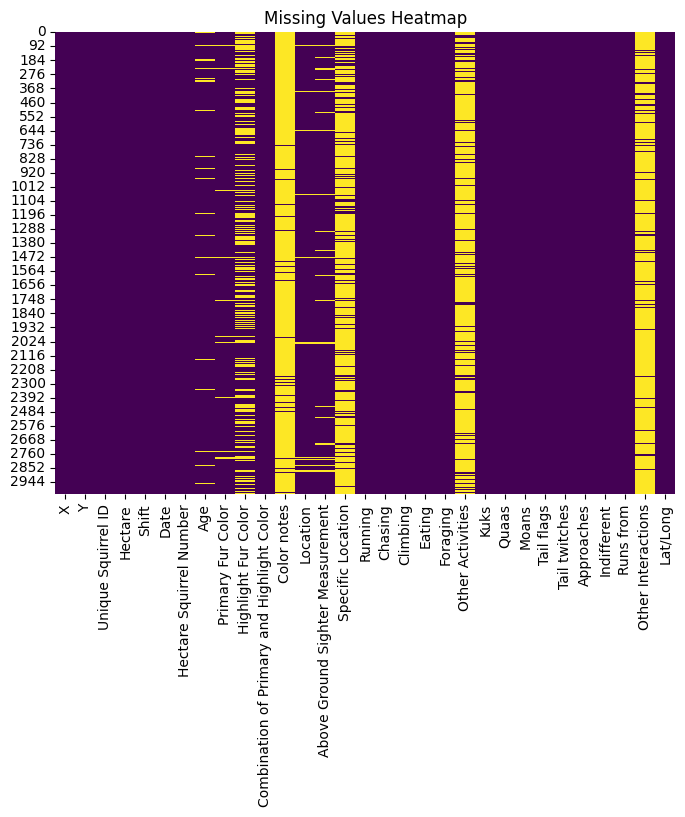

In [4]:
#missingness
plt.figure(figsize=(8,6))
sns.heatmap(nyc_squirrels.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
#plt.savefig('Missing Squirrel Data', dpi=300)
plt.show()

In [5]:
#check amount of missing data in each column 
missing_data = nyc_squirrels.isna().sum()
print(missing_data)

print("Total squirrels in dataset: ", len(nyc_squirrels))

#drop unneded columns 
drop_columns = ['Color notes', 'Specific Location', 'Other Activities', 'Other Interactions', 'Highlight Fur Color']
clean_squirrels = nyc_squirrels.drop(columns = drop_columns)
clean_squirrels = clean_squirrels.dropna()
missing_data_ap = clean_squirrels.isna().sum()
print(missing_data)
clean_squirrels

X                                                0
Y                                                0
Unique Squirrel ID                               0
Hectare                                          0
Shift                                            0
Date                                             0
Hectare Squirrel Number                          0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Color notes                                   2841
Location                                        64
Above Ground Sighter Measurement               114
Specific Location                             2547
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                       

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Combination of Primary and Highlight Color,...,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,10102018,2,Adult,Gray,Gray+,...,True,False,False,False,False,False,False,False,False,POINT (-73.9541201789795 40.7931811701082)
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,Gray+,...,True,False,False,False,False,False,False,True,False,POINT (-73.9582694312289 40.7917367820255)
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,Gray+,...,False,False,False,False,True,True,False,False,False,POINT (-73.9674285955293 40.7829723919744)
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Gray+Cinnamon,...,False,False,False,False,False,False,False,True,False,POINT (-73.9722500196844 40.7742879599026)
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,10132018,5,Adult,Gray,Gray+White,...,True,False,False,False,False,False,False,True,False,POINT (-73.9695063535333 40.7823507678183)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,-73.964544,40.781160,21F-PM-1018-02,21F,PM,10182018,2,Juvenile,Cinnamon,Cinnamon+Gray,...,True,False,False,False,False,False,False,False,True,POINT (-73.9645437409662 40.7811599933331)
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,Gray+,...,True,False,False,False,False,False,False,False,True,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,Gray+White,...,True,False,False,False,False,False,False,True,False,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Gray+Black, Cinnamon, White",...,True,False,False,False,False,False,False,True,False,POINT (-73.9665871993517 40.7836775064883)


The bulk of the cleaning for this dataset was in the hectare data. The hectare dataset listed the latitude and longitude in a single string with extensive formatting, so they needed to be extracted, using a regular expression, and split into seperate columns.

In [8]:
# Extract coordinate pairs using regex
def extract_coords(wkt):
    # Remove the leading "MULTIPOLYGON (((" and trailing ")))"
    cleaned = re.sub(r'^MULTIPOLYGON\s+\(\(\(|\)\)\)$', '', wkt)
    # Split into individual coordinate pairs
    coord_pairs = cleaned.split(', ')
    # Split each pair into lon and lat
    coords = [coord.split() for coord in coord_pairs]
    return coords

# Apply extraction
hectare['coords'] = hectare['the_geom'].apply(extract_coords)

# Convert coordinate lists to individual columns
# Flatten coordinates into new DataFrame columns
coord_df = hectare['coords'].apply(lambda x: pd.Series([float(num) for pair in x for num in pair]))

# Rename the columns as lon_1, lat_1, lon_2, lat_2, ...
coord_df.columns = [f"{'lon' if i % 2 == 0 else 'lat'}_{i//2 + 1}" for i in coord_df.columns]

# Concatenate with original DataFrame
hectare_final = pd.concat([hectare.drop(columns='coords'), coord_df], axis=1)

The squirrel data also used a different labeling system to identify hectares than the hectare data sets, so the two labeling systems had to be unified. This was achived by taking the location of one squirrel reported in each hecatre in the squirrel dataset, and finding which hectare in the hecatre dataset it's location fell within. These labels were then paired, and the datasets joined on the corresponding hectare labels.

In [9]:
#saving the location of one squirrel identified in each hectare
squirrel_hec_id = nyc_squirrels[['X','Y','Hectare']]
squirrel_hec_id = squirrel_hec_id.sort_values(by = 'Hectare')
squirrel_hec_id.drop_duplicates(subset=["Hectare"], keep="first", inplace=True)
squirrel_hec_id.reset_index(drop=True, inplace=True)

#making and naming the polygons with shapely
hectares_shapely = []
for i in range(len(hecatre_final)):
    p = (Polygon([(hectare_final.iloc[i,7],hectare_final.iloc[i,6]),
                  (hectare_final.iloc[i,9],hectare_final.iloc[i,8]),
                  (hectare_final.iloc[i,11],hectare_final.iloc[i,10]),
                  (hectare_final.iloc[i,13],hectare_final.iloc[i,12])]),
                 f'{hectare_final.iloc[i,1]}')
    hectares_shapely.append(p)

#finding which hectare each squirrel point belongs in
hectare_assign = []
for i in range(len(squirrel_hec_id)):
    p = Point(squirrel_hec_id.iloc[i,1],squirrel_hec_id.iloc[i,0])
    for s in hectares_shapely:
        if s[0].contains(p) == True:
            h = (([squirrel_hec_id.iloc[i,2],s[1]]))
            hectare_assign.append(h)
     
hectare_assign = pd.DataFrame(hectare_assign, columns = ['Hectare', 'id'])
hectare_assign['id'] = hectare_assign['id'].astype('int64')

#joinging the squirrels data with the hectare id number
nyc_squirrels = nyc_squirrels.merge(hectare_assign, how='left', on='Hectare')

NameError: name 'hecatre_final' is not defined

Finally, we wanted a way to catagorize the squirrels as having displayed a behavior associated with fear or not. There are several behavior columns that correlate to fear, so we created an additional column to aggregate these behaviors.

In [ ]:
#Dispays of fear
fear_columns_ap = ['Quaas', 'Moans', 'Tail flags', 'Runs from']
fear_ap = nyc_squirrels[fear_columns_ap].apply(pd.Series.value_counts)
print(fear_ap)

#add a new column where it is marked true if it showed at least one fear trait
nyc_squirrels["showed_fear_ap"] = nyc_squirrels[fear_columns_ap].applymap(
    lambda x: str(x).strip().lower() in ["yes", "true", "1"]
).any(axis=1)

### Exploratory Analysis


With the data being nominal we plan to use bar charts to get a sense of the general distribution of our data. Working with geographical data is new for us, so we are open to different methods, but based on our initial research we are going to start with the folium library in Python to map up the distribution of observations


### Analysis Methodology


We are planning to test for the correlation (and strength of that correlation) between physical traits and behaviors, using the chi squared test of independence and Carmer’s V test. We will also test the correlation between the location in the park, and squirrel behavior, which we will analyze with an ANOVA test.


### Project Schedule

 Important Project Dates:

- **Feb 11** – Meet with group  
  Decide on project topic

- **Feb 21** – Announce Team/Title

- **Feb 25** – Meet with group  
  Split up proposal tasks  
  - Ashley = Intro/background and schedule  
  - Maya = Data cleaning and processing and data description?  
  - Mikayla = Project objectives and Ethical considerations  
  - Group = Anything else that I don’t remember

- **March 4** – Meet with group  
  Review proposal  
  Complete and revisions decided upon  
  Figure out how we will all work with the data (Github repo? Emailing files?)  
  How often do we want to meet? Days/time that work best?

- **March 7** – Project Proposal  
  Ideally submit early

- **March 11** – Meet with group  
  Clean data  
  [Zoom Link](https://utah.zoom.us/j/96194506954) Passcode: simp

- **March 18** – Meet with group  
  Initial analysis  
  [Zoom Link](https://utah.zoom.us/j/96194506954) Passcode: simp

- **March 20** – Peer Feedback (in-class)  
  Zoom or Facetime Mikayla, if not make sure that detailed notes are taken!  
  Schedule a group meeting to go over peer feedback as a team

- **March 21** – Project Milestone Report  
  Assignment on Canvas, seems similar to proposal but with additional updates  
  Group Feedback Form - All submit  

- **March 25** – Meet with group  
  Final analysis  
  [Zoom Link](https://utah.zoom.us/j/96194506954) Passcode: simp

- **April 1** – Meet with group  
  Visualizations  
  [Zoom Link](https://utah.zoom.us/j/96194506954) Passcode: simp

- **March 31 - April 4** – Professor/TA feedback (by appointment)  
  Email about a week in advance to schedule an appointment if there is not a sign-up sheet provided  
  Meet with group afterward to discuss feedback

- **April 8** – Group meeting  
  Film presentation  
  [Zoom Link](https://utah.zoom.us/j/96194506954) Passcode: simp

- **April 18** – Final Project

- **April 22** – Project Awards
